In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

given dta set contain 614 rows and 13 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


there are 5 numerical feature and 8 categorical features in the give data set

In [6]:
data.describe().round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


observations:
    1. Minimum income of an applicant is  and the maximum is 81000 where the 75th prcentile is 5795, hence there are outliers in this feture
    2. Co applicant name minimum is 0, 75th precentile is 2297 and the mximum is 41667, hence there are outliers in this feaatures
    3. Minimum loan amount is 9 and the maximum is 700 where as the 75th prcentile is 700, henc there are outliers in this feature
    4. minimum loan term is 12 and the maximum is 480
    5. credit History fetures must be a categorical featrue, hence outliers in the feature wont be fixed but it will be encoded in feature engineering section

# EXPLORATORY ANALYSIS

# Univariate Analysis

In [13]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
data.Loan_ID.value_counts()

LP001577    1
LP001259    1
LP002494    1
LP002348    1
LP002281    1
           ..
LP002065    1
LP002804    1
LP001922    1
LP001749    1
LP002950    1
Name: Loan_ID, Length: 614, dtype: int64

Loan ID is unique for each rows in the given data set, this feature should not impact the target variable, it can be removed in feaature engineering if needed

<AxesSubplot:xlabel='Gender', ylabel='count'>

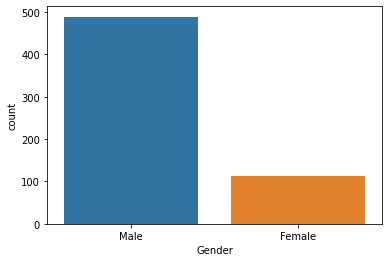

In [15]:
sns.countplot(data['Gender'])

most of the applicates are male in the given data set, less female. nearly 500 dta are from male category

<AxesSubplot:xlabel='Married', ylabel='count'>

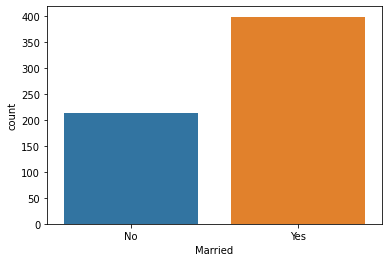

In [16]:
sns.countplot(data['Married'])

most of the loan applicants are married in the given datas set, nearly 400 applicants are married and nearly 210 applicants are singles 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

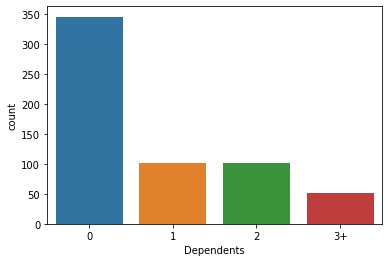

In [17]:
sns.countplot(data['Dependents'])

nearly 350 applicants are independent and there are no dependents for them
nearly 50 applicants are having 3+ dependents
Neaarly 100 apllicants are having 1 and 2 depndents each

<AxesSubplot:xlabel='Education', ylabel='count'>

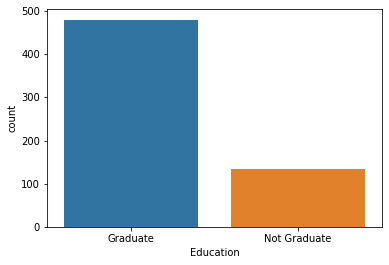

In [19]:
sns.countplot(data['Education'])

nearly 450 applicants are graduates and 100+ applicants are non graduates

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

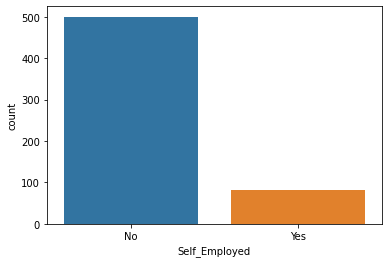

In [21]:
sns.countplot(data['Self_Employed'])

less than 100 applicants are self employeed rest are working professionals in the given data set

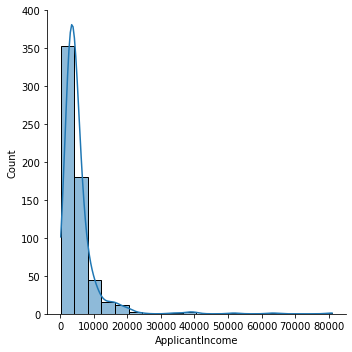

In [25]:
sns.displot(data['ApplicantIncome'],bins=20,kde=True)

Applicant income skewed to the right, minimum salary is 0 and the maximum is nearly 80000. Majority of the applicants income falls between 0 to 20000

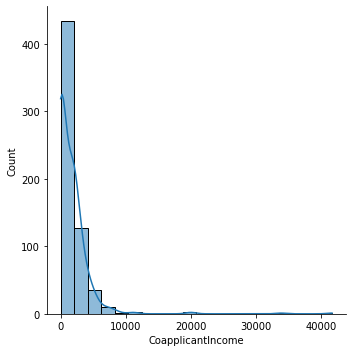

In [26]:
sns.displot(data['CoapplicantIncome'],bins=20,kde=True)

Co-applicant income skewed to the right, minimum salary is 0 and the maximum is nearly 40000. Majority of the co-applicants income falls between 0 to 8000

In [27]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

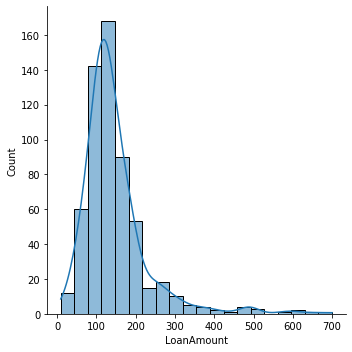

In [28]:
sns.displot(data['LoanAmount'],bins=20,kde=True)

Loan amount feature is skewed to the right, minimum loan amount is 0 and the maximum is nealy 700. 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

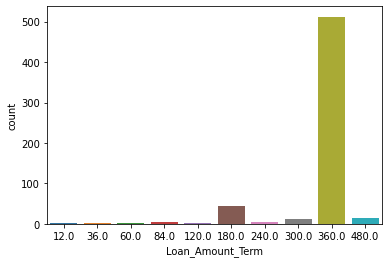

In [30]:
sns.countplot(data['Loan_Amount_Term'])

more than 500 applicants loan term is 36. Minimum term is 1 and the maximum is 48 terms. we will encode them in feature engineering

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

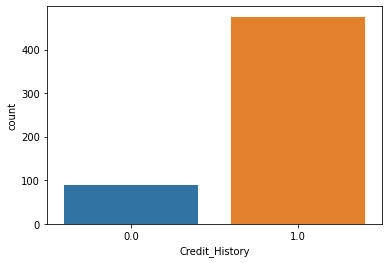

In [31]:
sns.countplot(data['Credit_History'])

nearly 480 applicants credit history is 1, this must be a categorical feture we will encode them in feature engineering.
nearly 100 applicants credit history is 0.

In [35]:
data['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

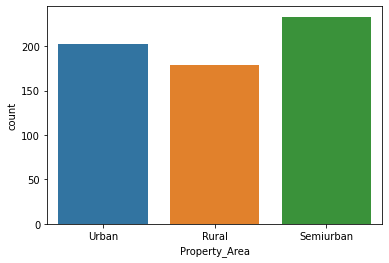

In [34]:
sns.countplot(data['Property_Area'])

majority of loan applicants are from Semi urban, then Urban and Rural Property_Area

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

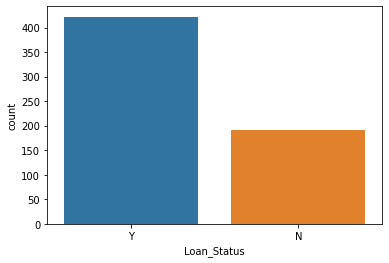

In [37]:
sns.countplot(data['Loan_Status'])

In [38]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Target variable (Loan Status) is imbalanced, approved status are nearly 400 and nearly 200 is in disapproved 

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Gender', ylabel='count'>

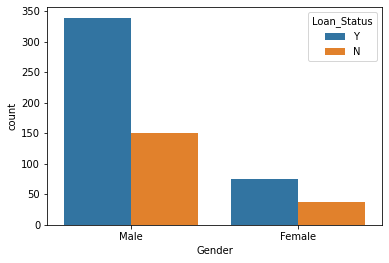

In [43]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

nearly 500 applicants are males and 330 applications are approved as per given data set
nearly 125 applicants are femles and nearly 75 applications are approved

<AxesSubplot:xlabel='Married', ylabel='count'>

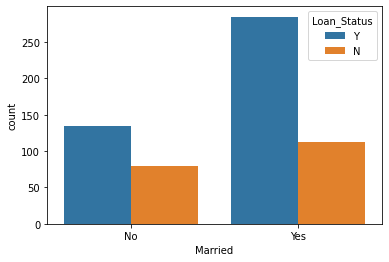

In [44]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

married applicants are high in the ive data set.                 
nearly 400 applicants are married and nearly 280 applications are approved
nearly 210 applicants are married and nearly 130 applications are approved

<AxesSubplot:xlabel='Dependents', ylabel='count'>

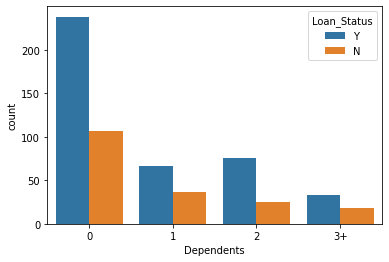

In [46]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data)

Highest applicants are not having any dependents nd the maximum approval is also on dependent category is 0.

<AxesSubplot:xlabel='Education', ylabel='count'>

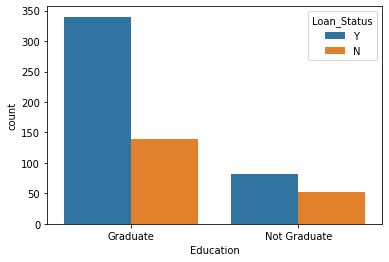

In [74]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

highest loan applicats are from education category Graduates. nearly 500 pplicats are graduates in which 330 appications are approved
nearly 130 applicants are from Non graduates category in which nealy 80 to 90 applications are approved

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

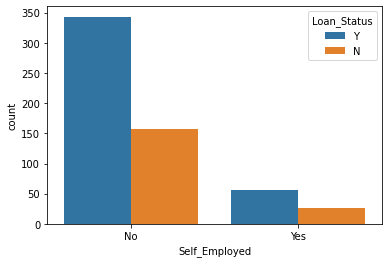

In [77]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

majority applicants are from non self employeed category.
nearly 500 applicants are from non self employed category in which neaaly 340 applications are approved
self employeed applicats are very few in the give data set., it also looks like the re are some missing values in this feature, we will handle them in feature engineering section

In [78]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

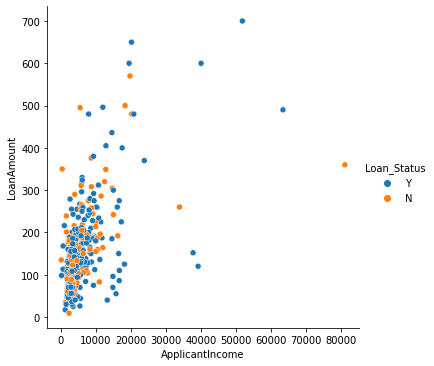

In [85]:
sns.relplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=data)

majority of data falls between the loan range of 300 and applicant income rnge of 20000.

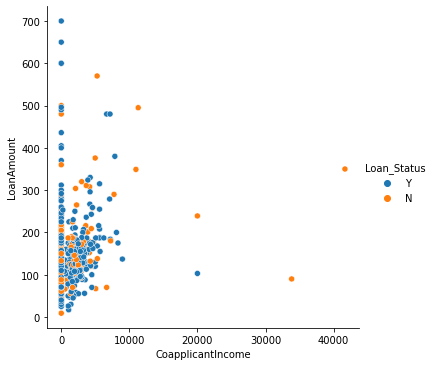

In [89]:
sns.relplot(x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status',data=data)

mjority data falls in the co applicant income rnge of below 10000.

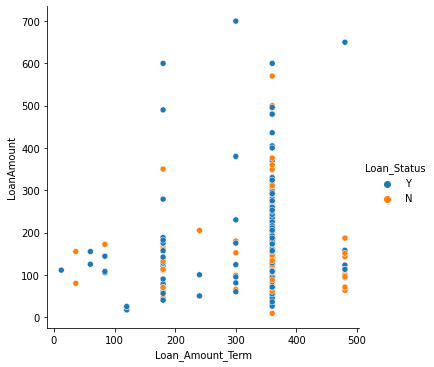

In [93]:
sns.relplot(x='Loan_Amount_Term',y='LoanAmount',hue='Loan_Status',data=data)

maximum approval status is falling in the terms rnge between 300 to 400. loan terms more than 400 is aximum dis approved in the give daata set

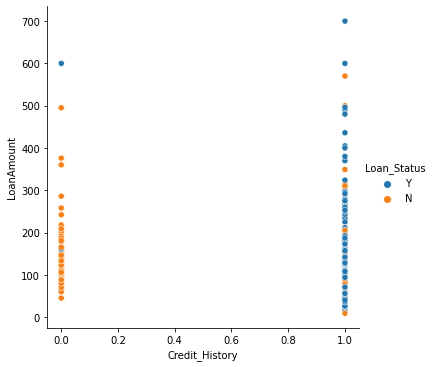

In [94]:
sns.relplot(x='Credit_History',y='LoanAmount',hue='Loan_Status',data=data)

credit history as  pplicats applications re highly approved and the  is highly disapproved

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

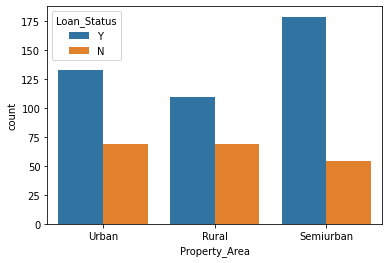

In [96]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)

applicants whose property area falls under category Semi urban applications ars highly approved.
Urban and Rural looks mor or less same.

# MULTIVARIATE ANALYSIS

<AxesSubplot:>

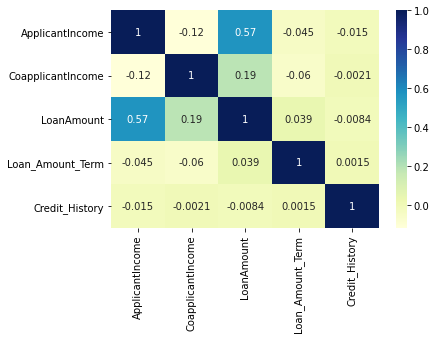

In [97]:
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

Loan amount and applicant income featurs correlates with each other.                    
Rest features correlates very low with each other

# FEATURE ENGINEERING

# missing values Handling

In [98]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in features Gender,Married,Dependents,SelfZ_employed, LonAmount,Loan_Amount_term, Credit_History., lets fix them with imputations as needed.

In [100]:
#Since gender,Married,Dependents,Self_employed,Loan_Amount_term,Credit_History is a categorical variable , lets replace the null values with mode
##since Loan Amount is numerical feature and its not following normal distribution, we will rplace the nan valuse with median


Gender_mode=data['Gender'].mode()[0]
Married_mode=data['Married'].mode()[0]
Dependents_mode=data['Dependents'].mode()[0]
Self_Employed_mode=data['Self_Employed'].mode()[0]
Loan_Amount_Term_mode=data['Loan_Amount_Term'].mode()[0]
Credit_History_mode=data['Credit_History'].mode()[0]


In [101]:
data['Gender']=data['Gender'].replace(np.NaN,Gender_mode)
data['Married']=data['Married'].replace(np.NaN,Married_mode)
data['Dependents']=data['Dependents'].replace(np.NaN,Dependents_mode)
data['Self_Employed']=data['Self_Employed'].replace(np.NaN,Self_Employed_mode)
data['Loan_Amount_Term']=data['Loan_Amount_Term'].replace(np.NaN,Loan_Amount_Term_mode)
data['Credit_History']=data['Credit_History'].replace(np.NaN,Credit_History_mode)

In [102]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

now the null values in categorical features are fixed, lets fix the null vlues in numerical feature

In [103]:
data['LoanAmount']=data['LoanAmount'].replace(np.NaN,data.LoanAmount.median())

In [104]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now the missing values are fixed

# Outliers Handling

ApplicantIncome         AxesSubplot(0.125,0.536818;0.227941x0.343182)
CoapplicantIncome    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
LoanAmount           AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Loan_Amount_Term           AxesSubplot(0.125,0.125;0.227941x0.343182)
Credit_History          AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

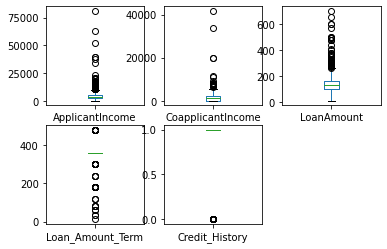

In [106]:
data.plot(kind='box',subplots=True,layout=(2,3))

Loan amount term and Credit_history must be categorical features hence we will not be fixing the outliers in those features we will handle them in endoing techniques.          
We will fix the outliers in other features

since fetures are very less., we will use IQR transformation technique to reemove the outliers

In [109]:
#lets define a common function to fit the outliers within inter quartile range

def iqrfunction(feature):
    Q1=data[feature].quantile(0.25)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    print("Q1 is: ",Q1)
    print("Q3 is :",Q3)
    print("IQR is ",IQR)
    Lower_limit=Q1-(1.5*IQR)
    Higher_limit=Q3+(1.5*IQR)
    print("lower range is ",Lower_limit)
    print("Higher rnge is ",Higher_limit)
    data[feature]=np.where(data[feature]<Lower_limit,Lower_limit,data[feature])
    data[feature]=np.where(data[feature]>Higher_limit,Higher_limit,data[feature])
    data[feature].plot.box()
    

Q1 is:  2877.5
Q3 is : 5795.0
IQR is  2917.5
lower range is  -1498.75
Higher rnge is  10171.25


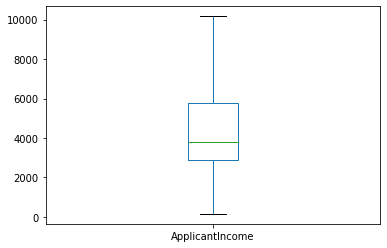

In [110]:
iqrfunction('ApplicantIncome')

Q1 is:  0.0
Q3 is : 2297.25
IQR is  2297.25
lower range is  -3445.875
Higher rnge is  5743.125


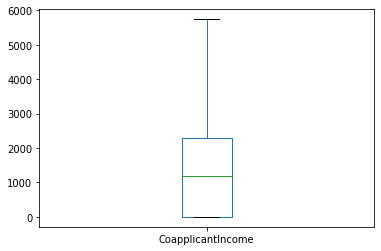

In [111]:
iqrfunction('CoapplicantIncome')

Q1 is:  100.25
Q3 is : 164.75
IQR is  64.5
lower range is  3.5
Higher rnge is  261.5


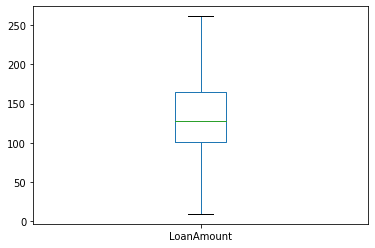

In [112]:
iqrfunction('LoanAmount')

ApplicantIncome         AxesSubplot(0.125,0.536818;0.227941x0.343182)
CoapplicantIncome    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
LoanAmount           AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Loan_Amount_Term           AxesSubplot(0.125,0.125;0.227941x0.343182)
Credit_History          AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

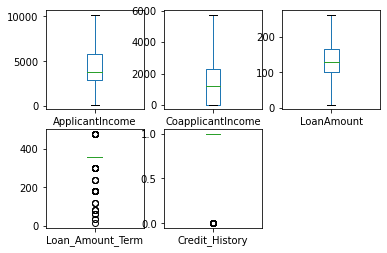

In [113]:
data.plot(kind='box',subplots=True,layout=(2,3))

now outliers in numercial feaatures are fixed, we will handle categorical feautres in encoding

# SKEWNESS CORRECTION

In [114]:
data.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
ApplicantIncome,1.039846,0.126478
CoapplicantIncome,1.012763,0.244711
LoanAmount,0.683693,0.112493
Loan_Amount_Term,-2.402112,6.924993
Credit_History,-2.021971,2.095179


Loan amount term and Credit_history must be categorical features hence we will not be fixing the skewwness in those features we will handle them in endoing techniques.

In [118]:
df=data.copy()

In [119]:
df['ApplicantIncome']=np.sqrt(data['ApplicantIncome'])
df['ApplicantIncome'].skew()

0.5407405359801637

In [120]:
df['CoapplicantIncome']=np.sqrt(data['CoapplicantIncome'])
df['CoapplicantIncome'].skew()

0.19282967978686388

In [121]:
df['LoanAmount']=np.sqrt(data['LoanAmount'])
df['LoanAmount'].skew()

0.06413966158093104

In [123]:
df.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
ApplicantIncome,0.540741,-0.173755
CoapplicantIncome,0.192830,-1.473221
LoanAmount,0.064140,0.210157
Loan_Amount_Term,-2.402112,6.924993
Credit_History,-2.021971,2.095179


now the skewness in all numerical features are fixed.

In [124]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,76.478755,0.000000,11.313708,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,360.0,1.0,Urban,Y


In [125]:
categorical_features=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

In [127]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()

In [129]:
for i in categorical_features:
    df[i] = Encoder.fit_transform(df[i])

In [130]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,76.478755,0.000000,11.313708,8,1,2,1
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,8,1,0,0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,8,1,2,1
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,8,1,2,1
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,8,1,2,1


now the categorical features are encoded., lets standardise the daata using standard scaler, to do so we will split the data into train and test using basic classification model to avoid over fitting into the model

In [159]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [161]:
best_acc=0
best_random=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    accuracy=accuracy_score(y_test, pred)
    if accuracy>best_acc:
        best_acc=accuracy
        best_random=i

print("Best Accuracy score is : ",best_acc,' and Random_state is : ',i)    

Best Accuracy score is :  0.8861788617886179  and Random_state is :  99


In [162]:
print(confusion_matrix(y_test,pred))

[[13 28]
 [ 3 79]]


In [163]:
result=pd.DataFrame({})
result['y_test']=y_test
result['pred']=pred

In [164]:
result.head()

,y_test,pred
562,1,1
545,1,1
162,0,0
191,0,1
10,1,1


In [165]:
result['y_test'].value_counts()

1    82
0    41
Name: y_test, dtype: int64

In [166]:
result['pred'].value_counts()

1    107
0     16
Name: pred, dtype: int64

Logistic regression gives the accuracy of 88.61% with the random state of .99, lets split the data, then we will statdardise the data

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=99)

In [168]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)

In [169]:
X_test=scaler.transform(x_test)

Now the data set is scaled., lets do over saampling technique SMOTE to balance the dataset

In [170]:
y_test.value_counts()

1    82
0    41
Name: Loan_Status, dtype: int64

In [172]:
y_train.value_counts()

1    340
0    151
Name: Loan_Status, dtype: int64

# OVER SAMPLING

In [173]:
from imblearn.over_sampling import SMOTE

In [174]:
x_train_os,y_train_os=SMOTE(random_state=99).fit_resample(X_train, y_train)
y_train_os.value_counts()

0    340
1    340
Name: Loan_Status, dtype: int64

Now the data set is balanced. lets perform model selection

# MODEL SELECTION
LOGISTIC REGRESSION

In [176]:
LR=LogisticRegression()
LR.fit(x_train_os,y_train_os)
LR_PRED=LR.predict(X_test)
accuracy=accuracy_score(y_test,LR_PRED)
print('Accuracy of Logistic Regression is :',accuracy)
print("Classification report for Logistic Regression is : \n",classification_report(y_test,LR_PRED))
print("confusion report for Logistic Regression is : \n", confusion_matrix(y_test,LR_PRED))

Accuracy of Logistic Regression is : 0.7479674796747967
Classification report for Logistic Regression is : 
               precision    recall  f1-score   support

           0       0.75      0.37      0.49        41
           1       0.75      0.94      0.83        82

    accuracy                           0.75       123
   macro avg       0.75      0.65      0.66       123
weighted avg       0.75      0.75      0.72       123

confusion report for Logistic Regression is : 
 [[15 26]
 [ 5 77]]


# DecisionTreeClassifier

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train_os,y_train_os)
DTC_PRED=DTC.predict(X_test)
accuracy=accuracy_score(y_test,DTC_PRED)
print('Accuracy of DecisionTreeClassifier is :',accuracy)
print("Classification report for DecisionTreeClassifier is : \n",classification_report(y_test,DTC_PRED))
print("confusion report for DecisionTreeClassifier is : \n", confusion_matrix(y_test,DTC_PRED))

Accuracy of DecisionTreeClassifier is : 0.6260162601626016
Classification report for DecisionTreeClassifier is : 
               precision    recall  f1-score   support

           0       0.44      0.44      0.44        41
           1       0.72      0.72      0.72        82

    accuracy                           0.63       123
   macro avg       0.58      0.58      0.58       123
weighted avg       0.63      0.63      0.63       123

confusion report for DecisionTreeClassifier is : 
 [[18 23]
 [23 59]]


# ADABOOST CLASSIFIER

In [180]:
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier

In [181]:
ADA=AdaBoostClassifier()
ADA.fit(x_train_os,y_train_os)
ADA_PRED=ADA.predict(X_test)
accuracy=accuracy_score(y_test,ADA_PRED)
print('Accuracy of AdaBoostClassifier is :',accuracy)
print("Classification report for AdaBoostClassifier is : \n",classification_report(y_test,ADA_PRED))
print("confusion report for AdaBoostClassifier is : \n", confusion_matrix(y_test,ADA_PRED))

Accuracy of AdaBoostClassifier is : 0.7154471544715447
Classification report for AdaBoostClassifier is : 
               precision    recall  f1-score   support

           0       0.59      0.46      0.52        41
           1       0.76      0.84      0.80        82

    accuracy                           0.72       123
   macro avg       0.68      0.65      0.66       123
weighted avg       0.70      0.72      0.71       123

confusion report for AdaBoostClassifier is : 
 [[19 22]
 [13 69]]


# RANDOM FOREST CLASSIFIER

In [182]:
RFC=RandomForestClassifier()
RFC.fit(x_train_os,y_train_os)
RFC_PRED=RFC.predict(X_test)
accuracy=accuracy_score(y_test,RFC_PRED)
print('Accuracy of RFC is :',accuracy)
print("Classification report for RFC is : \n",classification_report(y_test,RFC_PRED))
print("confusion report for RFC is : \n", confusion_matrix(y_test,RFC_PRED))

Accuracy of RFC is : 0.7642276422764228
Classification report for RFC is : 
               precision    recall  f1-score   support

           0       0.77      0.41      0.54        41
           1       0.76      0.94      0.84        82

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.77      0.76      0.74       123

confusion report for RFC is : 
 [[17 24]
 [ 5 77]]


# XGBOOSTCLASSIFER

In [183]:
import xgboost as xgb

In [185]:
XGB=xgb.XGBClassifier()
XGB.fit(x_train_os,y_train_os)
XGB_PRED=XGB.predict(X_test)
accuracy=accuracy_score(y_test,RFC_PRED)
print('Accuracy of XGB is :',accuracy)
print("Classification report for XGB is : \n",classification_report(y_test,XGB_PRED))
print("confusion report for XGB is : \n", confusion_matrix(y_test,XGB_PRED))

[22:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB is : 0.7642276422764228
Classification report for XGB is : 
               precision    recall  f1-score   support

           0       0.65      0.41      0.51        41
           1       0.75      0.89      0.82        82

    accuracy                           0.73       123
   macro avg       0.70      0.65      0.66       123
weighted avg       0.72      0.73      0.71       123

confusion report for XGB is : 
 [[17 24]
 [ 9 73]]


# SVC

In [186]:
import sklearn.svm as svm

In [187]:
clf = svm.SVC(decision_function_shape='ovo')

clf.fit(x_train_os,y_train_os.ravel())
svc_pred=clf.predict(X_test)


In [188]:
print("SVC accuracy is : ",accuracy_score(y_test,svc_pred))
print("SVC confusion matrix : \n",confusion_matrix(y_test,svc_pred))
print("SVC classification report is: \n",classification_report(y_test,svc_pred))

SVC accuracy is :  0.7398373983739838
SVC confusion matrix : 
 [[18 23]
 [ 9 73]]
SVC classification report is: 
               precision    recall  f1-score   support

           0       0.67      0.44      0.53        41
           1       0.76      0.89      0.82        82

    accuracy                           0.74       123
   macro avg       0.71      0.66      0.67       123
weighted avg       0.73      0.74      0.72       123



# CROSS VALIDATION

In [189]:
from sklearn.model_selection import cross_val_score

In [190]:
print("Logistic regression cross validation accuracy is :", cross_val_score(LR,x,y,cv=5).mean())

Logistic regression cross validation accuracy is : 0.8078235372517659


In [191]:
print("Decision cross validation accuracy is :", cross_val_score(DTC,x,y,cv=5).mean())

Decision cross validation accuracy is : 0.6400239904038385


In [192]:
print("ADA boost validation accuracy is :", cross_val_score(ADA,x,y,cv=5).mean())

ADA boost validation accuracy is : 0.6971877915500466


In [193]:
print("RFC cross validation accuracy is :", cross_val_score(RFC,x,y,cv=5).mean())

RFC cross validation accuracy is : 0.7621484739437558


In [194]:
print("XGB cross validation accuracy is :", cross_val_score(XGB,x,y,cv=5).mean())

[22:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [195]:
print("SVC cross validation accuracy is :", cross_val_score(clf,x,y,cv=5).mean())

SVC cross validation accuracy is : 0.6872984139677463


Model	CRV	MODEL	Diff                    
LR	80.78	74.79	5.99                      
DTC	64	62.6	1.4                           
ADA	69.71	71.54	-1.83                     
RFC	76.21	76.42	-0.21                            
XGB	77.34	76.42	0.92                           
SVC	68.72	73.98	-5.26                        


best performing model is Random forest classifier with the accuracy of 76%

# Hence the best performing model is Random forest classifier

In [200]:
from sklearn.model_selection import GridSearchCV

In [204]:
parmeters={
    'n_estimators':[10,100],
    'class_weight':['balanced','balanced_subsample'],
    'criterion':['gini','entropy'],
    'max_features' : ['auto', 'sqrt'],
    'bootstrap':['True','False'] 
}

In [205]:
gsv=GridSearchCV(RFC,parmeters)
gsv.fit(x_train_os,y_train_os)
gsv

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': ['True', 'False'],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 100]})

In [206]:
print(gsv.best_params_)

{'bootstrap': 'True', 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}


In [207]:
Final_mod=RandomForestClassifier(class_weight='balanced',criterion='gini',n_estimators=100,max_features='auto',bootstrap='True')
Final_mod.fit(x_train_os,y_train_os)
Final_mod_pred=RFC.predict(X_test)
print(accuracy_score(y_test,Final_mod_pred))
print(confusion_matrix(y_test,Final_mod_pred))

0.7479674796747967
[[14 27]
 [ 4 78]]


In [209]:
Final_mod_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [211]:
y_test=np.array(y_test)

In [212]:
y_test

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1])

# AUC ROC CURVE

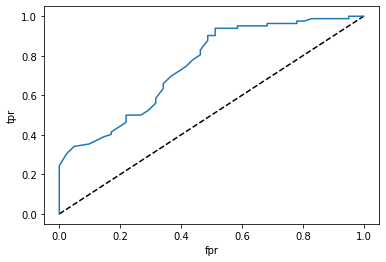

In [213]:
from sklearn.metrics import roc_curve , roc_auc_score

y_pred_prob=Final_mod.predict_proba(X_test)[:,1]
fpr,tpr,threshold =roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random forest Classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()


# SAVING MODEL

In [215]:
import joblib

joblib.dump(Final_mod,'Final_mod1.pkl')

['Final_mod1.pkl']